In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from os import getcwd
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
path_sonnets = f"{getcwd()}/../tmp2/sonnets.txt"
data = open(path_sonnets).read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True))) # An LSTM Layer
model.add(Dropout(0.2)) # A dropout layer
model.add(LSTM(100)) # Another LSTM Layer
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation = 'softmax')) # A Dense Layer
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Pick a loss function and an optimizer
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_4 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=50, batch_size=128, verbose=1)

Train on 15462 samples
Epoch 1/50
15462/15462 [==============================] - 23s 2ms/sample - loss: 7.3369 - accuracy: 0.0200
Epoch 2/50
15462/15462 [==============================] - 9s 563us/sample - loss: 6.5533 - accuracy: 0.0219
Epoch 3/50
15462/15462 [==============================] - 8s 543us/sample - loss: 6.4584 - accuracy: 0.0227
Epoch 4/50
15462/15462 [==============================] - 9s 556us/sample - loss: 6.3931 - accuracy: 0.0283
Epoch 5/50
15462/15462 [==============================] - 9s 576us/sample - loss: 6.2910 - accuracy: 0.0327
Epoch 6/50
15462/15462 [==============================] - 10s 621us/sample - loss: 6.2107 - accuracy: 0.0354
Epoch 7/50
15462/15462 [==============================] - 9s 608us/sample - loss: 6.1424 - accuracy: 0.0383
Epoch 8/50
15462/15462 [==============================] - 18s 1ms/sample - loss: 6.0774 - accuracy: 0.0405
Epoch 9/50
15462/15462 [==============================] - 17s 1ms/sample - loss: 6.0151 - accuracy: 0.0443
Epoch 1

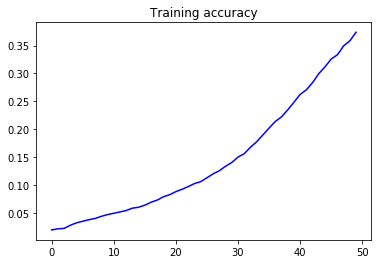

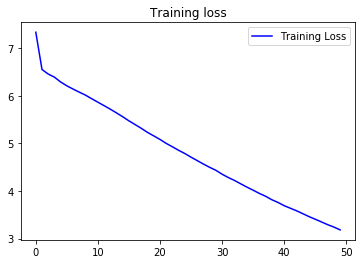

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of be beloved of rolling forth rolling forth men about ' dyed dyed light dyed dyed dyed dyed ride seen mistaking heart torn torn torn torn torn torn torn torn dyed dyed dyed light dyed torn torn dyed torn told live men about about light light prove me up men tongue hits friend ' still days seen chase thee mistaking mistaking seen mistaking brow leaves grew torn torn dyed torn torn torn dyed torn torn told go days light light light dyed still rare still ' me days more deem'd deem'd slain seen mistaking lie so sweet days ' open


In [13]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);